<h1 style="color:#F14925";><big>Titanic - Machine Learning from Disaster</big></h1>

This competition is one of the most popular introductory challenges on [Kaggle website](https://www.kaggle.com/competitions/titanic) and is designed to help participants learn the basics of data analysis, data visualization, and machine learning.


## Overview of the Competition:

* The Titanic competition is based on the sinking of the RMS Titanic in 1912.
* **The goal** is to predict whether a passenger survived or not (binary classification) based on the provided features.
* You are given two datasets: one for training and one for testing the model's performance.
    1. The training dataset contains information about passengers, including their age, sex, ticket class, fare, etc., along with a "Survived" column (1 for survived, 0 for not survived).
    1. The testing dataset is similar, but it does not have the "Survived" column that you need to predict.
    
### The competition is simple:
> Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.\
Using the patterns you find in the train.csv data, predict whether\
the other 418 passengers on board (found in test.csv) survived.

---
**Submission Score:  0.78947**

**Leaderboard position: 1418/16160**

**Top 9%**

---

# Data Description:

* The training dataset contains 12 columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.
* The testing dataset contains 11 columns (no "Survived" column).
* "Pclass" represents the passenger class (1st, 2nd, or 3rd class).
* "SibSp" refers to the number of siblings or spouses aboard.
* "Parch" refers to the number of parents or children aboard.
* "Embarked" represents the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

#### The data is contain in two files:
    
        1. Train.csv will contain the details of a subset of the passengers on board (891 to be exact) 
    and importantly, will reveal whether they survived or not, also known as the “ground truth”.

        2. The `test.csv` dataset contains similar information but does not disclose the “ground truth”
    for each passenger. It’s your job to predict these outcomes.
    
#### It is organized as follows:
    
    Variable | Definition	       |  Key
    ---------|---------------------|---------------------
    survival |  Survival	       |  0 = No, 1 = Yes
    pclass   |  Ticket class       | 1 = 1st, 2 = 2nd, 3 = 3rd
    sex      |   Sex               |  female, male	
    Age      |   Age in years      |
    sibsp    |   # of siblings /   |
             |   spouses aboard    |
             |   the Titanic       |
    parch	 |   # of parents /    |
             |   children aboard   |
             |   the Titanic       |
    ticket   |   Ticket number     |
    fare     |   Passenger fare    |
    cabin    |   Cabin number      |
    embarked |  Port of Embarkation|  C = Cherbourg, Q = Queenstown, S = Southampton

## Prepare the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Load the data

In [2]:
# check the train dataframe
train_df = pd.read_csv('kdata_train.csv', sep=',', header='infer')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
## Check test data frame
test_df  = pd.read_csv('kdata_test.csv', sep=',', header='infer')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Checking for missing values and simplifying meaningless columns in the dataframe.

In [4]:
### Get keys for reference
df_keys = train_df.keys()
df_keys = np.array(df_keys)
print('\nData Coloum labels:',df_keys)

### Checking for empty values
print('\n--Missing values in train data--\t')
mask = np.where(pd.isnull(train_df))[1]
mask = np.unique(mask, return_counts=True)

for i in range(len(mask[0])):
    print('Coloum: %s, Empty:%i corresponding to %.2f%%'%(df_keys[mask[0]][i],mask[1][i],mask[1][i]/890*100))


Data Coloum labels: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

--Missing values in train data--	
Coloum: Age, Empty:177 corresponding to 19.89%
Coloum: Cabin, Empty:687 corresponding to 77.19%
Coloum: Embarked, Empty:2 corresponding to 0.22%


    * "Age": could potentially be troublesome since we expecte that kids and older people to 
    had a lower chance to survive let go deep into this.
    
    * "Cabin": contains a lot of unkown entries, so we will ignore this coloum for now.
    
    * "Embarked": can be use let's set the 2 missing values to the most frequent value


In [5]:
### Checking for empty values
print('\n--Missing values in test data--\t')

df_keys_test = test_df.keys()
df_keys_test = np.array(df_keys)

mask = np.where(pd.isnull(test_df))[1]
mask = np.unique(mask, return_counts=True)

for i in range(len(mask[0])):
    print('Coloum: %s, Empty:%i corresponding to %.2f%%'%(df_keys_test[mask[0]][i],mask[1][i],mask[1][i]/418*100))


--Missing values in test data--	
Coloum: Sex, Empty:86 corresponding to 20.57%
Coloum: Ticket, Empty:1 corresponding to 0.24%
Coloum: Fare, Empty:327 corresponding to 78.23%


    "Age": As in the train data set, this could potentially be troublesome since we expecte that kids and older people to 
    had a lower chance to survive let go deep into this.
    
    "Cabin": we will ignore this coloum.
    
    "Fare": since it is only one let's manually set it

#### Dropped coulums: Cabin, PassengerId, and Ticket
    Cabin: Too many empty Values.
    PassengerId: is just the position on the list
    Ticket number: probably does not mean anything

In [6]:
train_df=train_df.drop(['Cabin','Ticket','PassengerId'],axis=1)
test_df=test_df.drop(['Cabin','Ticket','PassengerId'],axis=1)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### Filling missing values and encoding data

#### First set the Embarket

In [7]:
# most frequent value in a pandas column
embarked_mostfrequent = train_df['Embarked'].value_counts().idxmax()
print('most frequent value in a pandas column ',embarked_mostfrequent)

mask = pd.isnull(train_df['Embarked'])
temp = np.copy(train_df['Embarked'])
temp[mask] = embarked_mostfrequent
train_df['Embarked'] = temp
print('Any other missing value ',np.where(pd.isnull(train_df['Embarked'])))

most frequent value in a pandas column  S
Any other missing value  (array([], dtype=int64),)


In [8]:
## Encode class labels as integer values between 0 and (n_classes-1)
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(train_df['Embarked'])
train_df['Embarked'] = labelencoder.transform(train_df['Embarked'])
test_df['Embarked'] = labelencoder.transform(test_df['Embarked'])

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,0


In [10]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,2
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,2
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,2
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,2


#### Second relate the Age and the Name, 
    since the name contains their "honorific label" we are going to
    fill missing age values depending on their honorific name

In [11]:
honor = np.copy(train_df['Name'])
honor = [(name.split(',')[1]).split('.')[0][1:] for name in honor]

for i,name in enumerate(honor):
    if name=='Capt' or name=='Col' or name=='Don' or name=='Dr' or name=='Jonkheer' or name=='Major' or name=='Rev'or name=='Sir':
        honor[i] = 'Mr'
        
    elif name=='Lady' or name=='Mlle' or name=='Ms':
        honor[i] = 'Miss'
        
    elif name=='Mme' or name=='the Countess':
        honor[i] = 'Mrs'  
honor = np.array(honor)

    Mr -> refers to a male adult,
    Mrs -> Married women
    Miss -> non Married women
    Master -> kids
    
    can we correlate this to surv?

(array([ 40.,   0.,   0., 186.,   0.,   0., 538.,   0.,   0., 127.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

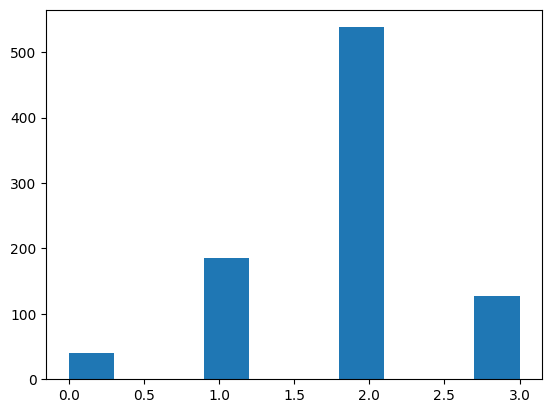

In [12]:
# Let's convert this values into numerical categories
## Encode class labels as integer values between 0 and (n_classes-1)
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(honor)
honor = labelencoder.transform(honor)

#['Master' 'Miss' 'Mr' 'Mrs'] ---> [0,1,2,3]
plt.hist(honor)

In [13]:
## Get the non-empty values of age
mask = pd.isnull(train_df['Age'])
honor_nonnan = honor[~mask]
age_nonnan = np.copy(train_df['Age'][~mask])

## Get the mean age value for each of the honor labels
mean_honor_age = [0,0,0,0]
for h in [0, 1, 2, 3]:
    mask = (honor_nonnan == h)
    mean_honor_age[h] = np.mean(age_nonnan[mask]).astype(np.int64)

print(' mean age for %s is %i'%(labelencoder.inverse_transform([0]),mean_honor_age[0]))
print(' mean age for %s is %i'%(labelencoder.inverse_transform([1]),mean_honor_age[1]))
print(' mean age for %s is %i'%(labelencoder.inverse_transform([2]),mean_honor_age[2]))
print(' mean age for %s is %i'%(labelencoder.inverse_transform([3]),mean_honor_age[3]))

print('\nFilling missing values...')
temp_age = np.copy(train_df['Age'])
temp = np.array([temp_age,honor]).T

for i,age in enumerate(temp):
    if pd.isna(age[0]):
        temp[i][0]= mean_honor_age[int(age[1])]
train_df['Age'] = temp.astype(np.int64)

print('\nCheck any missing value')
train_df['Age'][pd.isnull(train_df['Age'])]

 mean age for ['Master'] is 4
 mean age for ['Miss'] is 22
 mean age for ['Mr'] is 33
 mean age for ['Mrs'] is 35

Filling missing values...

Check any missing value


Series([], Name: Age, dtype: int64)

In [14]:
#### We could actually change the names by its honorific name to vectorize them
#Also we could make a family size group to gain more information
train_df['Name'] = honor


In [15]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,male,22,1,0,7.2500,2
1,1,1,3,female,38,1,0,71.2833,0
2,1,3,1,female,26,0,0,7.9250,2
3,1,1,3,female,35,1,0,53.1000,2
4,0,3,2,male,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,2,male,27,0,0,13.0000,2
887,1,1,1,female,19,0,0,30.0000,2
888,0,3,1,female,22,1,2,23.4500,2
889,1,1,2,male,26,0,0,30.0000,0


##### Let's do the same to fill empty ages in the test data frame:

In [16]:
honor = np.copy(test_df['Name'])
honor = [(name.split(',')[1]).split('.')[0][1:] for name in honor]
np.unique(honor)

for i,name in enumerate(honor):
    if name=='Col' or name=='Dr' or name=='Rev':
        honor[i] = 'Mr'
        
    elif name=='Dona' or name=='Ms':
        honor[i] = 'Miss'
        
honor = np.array(honor)

# Let's convert this values into numerical categories
honor = labelencoder.transform(honor)

mask = pd.isnull(test_df['Age'])
honor_nonnan = honor[~mask]
age_nonnan = np.copy(test_df['Age'][~mask])

mean_honor_age = [0,0,0,0]
for h in [0, 1, 2, 3]:
    mask = (honor_nonnan == h)
    mean_honor_age[h] = np.mean(age_nonnan[mask])

print(' mean age for %s is %i'%(labelencoder.inverse_transform([0]),mean_honor_age[0]))
print(' mean age for %s is %i'%(labelencoder.inverse_transform([1]),mean_honor_age[1]))
print(' mean age for %s is %i'%(labelencoder.inverse_transform([2]),mean_honor_age[2]))
print(' mean age for %s is %i'%(labelencoder.inverse_transform([3]),mean_honor_age[3]))


print('\nFilling missing values...')
temp_age = np.copy(test_df['Age'])
temp = np.array([temp_age,honor]).T

for i,age in enumerate(temp):
    if pd.isna(age[0]):
        temp[i][0]= mean_honor_age[int(age[1])]
test_df['Age'] = temp.astype(np.int64)

print('\nCheck any missing value')
test_df['Age'][pd.isnull(test_df['Age'])]

test_df['Name'] = honor
test_df

 mean age for ['Master'] is 7
 mean age for ['Miss'] is 22
 mean age for ['Mr'] is 32
 mean age for ['Mrs'] is 38

Filling missing values...

Check any missing value


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,male,34,0,0,7.8292,1
1,3,3,female,47,1,0,7.0000,2
2,2,2,male,62,0,0,9.6875,1
3,3,2,male,27,0,0,8.6625,2
4,3,3,female,22,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,2,male,32,0,0,8.0500,2
414,1,1,female,39,0,0,108.9000,0
415,3,2,male,38,0,0,7.2500,2
416,3,2,male,32,0,0,8.0500,2


#### lets normalize the values for age

In [17]:
labelencoder = preprocessing.StandardScaler(with_mean=True, with_std=True)
labelencoder.fit(np.array(train_df['Age']).reshape(-1, 1))
norm_age = labelencoder.transform(np.array(train_df['Age']).reshape(-1, 1)).flatten()
train_df['Age'] = norm_age

norm_age = labelencoder.transform(np.array(test_df['Age']).reshape(-1, 1)).flatten()
test_df['Age'] = norm_age

In [18]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,male,-0.587386,1,0,7.2500,2
1,1,1,3,female,0.617127,1,0,71.2833,0
2,1,3,1,female,-0.286258,0,0,7.9250,2
3,1,1,3,female,0.391281,1,0,53.1000,2
4,0,3,2,male,0.391281,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,2,male,-0.210976,0,0,13.0000,2
887,1,1,1,female,-0.813232,0,0,30.0000,2
888,0,3,1,female,-0.587386,1,2,23.4500,2
889,1,1,2,male,-0.286258,0,0,30.0000,0


In [19]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,male,0.315999,0,0,7.8292,1
1,3,3,female,1.294666,1,0,7.0000,2
2,2,2,male,2.423897,0,0,9.6875,1
3,3,2,male,-0.210976,0,0,8.6625,2
4,3,3,female,-0.587386,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,2,male,0.165435,0,0,8.0500,2
414,1,1,female,0.692409,0,0,108.9000,0
415,3,2,male,0.617127,0,0,7.2500,2
416,3,2,male,0.165435,0,0,8.0500,2


#### lets bin the Fare 

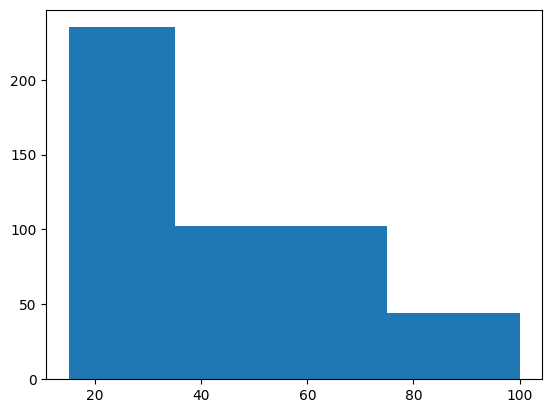

In [20]:
histo = plt.hist(train_df['Fare'],bins=[15,35,75,100])
fare_count,fare_bins = histo[0],histo[1]

In [21]:
fare = np.copy(train_df['Fare'])

groups = np.arange(len(fare_bins))
for i,far in enumerate(fare):
    if far <fare_bins[0]:
        fare[i] = groups[0]
    elif far <fare_bins[1]:
        fare[i] = groups[1]
    elif far <fare_bins[2]:
        fare[i] = groups[2]
    else:
        fare[i] = groups[3]
        
train_df['Fare']=fare.astype(int)

In [22]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,male,-0.587386,1,0,0,2
1,1,1,3,female,0.617127,1,0,2,0
2,1,3,1,female,-0.286258,0,0,0,2
3,1,1,3,female,0.391281,1,0,2,2
4,0,3,2,male,0.391281,0,0,0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,2,male,-0.210976,0,0,0,2
887,1,1,1,female,-0.813232,0,0,1,2
888,0,3,1,female,-0.587386,1,2,1,2
889,1,1,2,male,-0.286258,0,0,1,0


##### Bin fare for the test data

In [23]:
fare = np.copy(test_df['Fare'])

groups = np.arange(len(fare_bins))
for i,far in enumerate(fare):
    if far <fare_bins[0]:
        fare[i] = groups[0]
    elif far <fare_bins[1]:
        fare[i] = groups[1]
    elif far <fare_bins[2]:
        fare[i] = groups[2]
    else:
        fare[i] = groups[3]

        
test_df['Fare']=fare.astype(int)

In [24]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,male,0.315999,0,0,0,1
1,3,3,female,1.294666,1,0,0,2
2,2,2,male,2.423897,0,0,0,1
3,3,2,male,-0.210976,0,0,0,2
4,3,3,female,-0.587386,1,1,0,2
...,...,...,...,...,...,...,...,...
413,3,2,male,0.165435,0,0,0,2
414,1,1,female,0.692409,0,0,3,0
415,3,2,male,0.617127,0,0,0,2
416,3,2,male,0.165435,0,0,0,2


#### Convert Sex into a numerical value

In [25]:
train_df['Sex']=(train_df['Sex']=='female').astype(int)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,0,-0.587386,1,0,0,2
1,1,1,3,1,0.617127,1,0,2,0
2,1,3,1,1,-0.286258,0,0,0,2
3,1,1,3,1,0.391281,1,0,2,2
4,0,3,2,0,0.391281,0,0,0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,2,0,-0.210976,0,0,0,2
887,1,1,1,1,-0.813232,0,0,1,2
888,0,3,1,1,-0.587386,1,2,1,2
889,1,1,2,0,-0.286258,0,0,1,0


In [26]:
test_df['Sex']=(test_df['Sex']=='female').astype(int)
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,0,0.315999,0,0,0,1
1,3,3,1,1.294666,1,0,0,2
2,2,2,0,2.423897,0,0,0,1
3,3,2,0,-0.210976,0,0,0,2
4,3,3,1,-0.587386,1,1,0,2
...,...,...,...,...,...,...,...,...
413,3,2,0,0.165435,0,0,0,2
414,1,1,1,0.692409,0,0,3,0
415,3,2,0,0.617127,0,0,0,2
416,3,2,0,0.165435,0,0,0,2


### Let's check data types

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


### visualize correlation on the data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.073434,0.543351,-0.092853,-0.035322,0.081629,0.329232,-0.167675
Pclass,-0.338481,1.000000,-0.117194,-0.131900,-0.339511,0.083081,0.018443,-0.697794,0.162098
Name,-0.073434,-0.117194,1.000000,-0.033058,0.501643,-0.222212,-0.103666,0.007587,0.023065
Sex,0.543351,-0.131900,-0.033058,1.000000,-0.121678,0.114631,0.245489,0.237804,-0.108262
Age,-0.092853,-0.339511,0.501643,-0.121678,1.000000,-0.268392,-0.199150,0.109649,-0.022064
SibSp,-0.035322,0.083081,-0.222212,0.114631,-0.268392,1.000000,0.414838,0.310225,0.068230
Parch,0.081629,0.018443,-0.103666,0.245489,-0.199150,0.414838,1.000000,0.303941,0.039798
Fare,0.329232,-0.697794,0.007587,0.237804,0.109649,0.310225,0.303941,1.000000,-0.217540
Embarked,-0.167675,0.162098,0.023065,-0.108262,-0.022064,0.068230,0.039798,-0.217540,1.000000


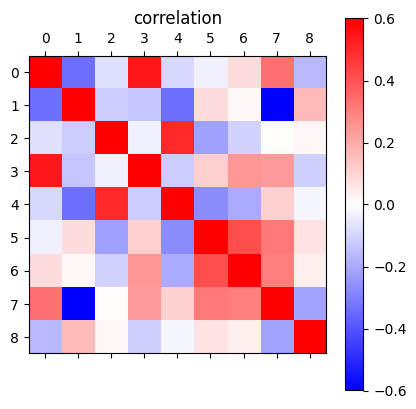

In [28]:
#let's check if there are some correlation on the data
corr=train_df.corr()
plt.matshow(corr,vmin=-0.6,vmax=0.6,cmap = 'bwr')
plt.colorbar()
plt.title('correlation')
corr#>0.2

    relevant fetures correlated *Survived*
        Pclass, Sex, Fare, Embarked
        
    * Pclass is highly correlated with ticket fare.
    
    * Other correlations are shown but let's ignore them for now
    
    
    Now let's contruct our data vector with the coloums
        D_vec = [Pclass, Sex, fare, Embarked]
    and the labels:
        D_labels = [Survived]
        
    Final Notes:
        How could I improve the correlation between surv and other parameters?
        for example Age doesn't seem to be correlated with survavility, why?
        Neither the title of the person

##  One hot econding

For better performance let's one hot encoding the categorical inputs

In [29]:
## Create new data frame with One hot encoding
train_OH = pd.DataFrame()
train_OH['Survived'] = train_df['Survived']
#train_OH['Age'] = train_df['Age']
train_OH['Sex'] = train_df['Sex']

group_vectorization = []
df_keys = ['Pclass', 'Name','Fare', 'Embarked']
for key in df_keys:
    group_size = np.unique(train_df[key])
    group_data = np.copy(train_df[key])
    group_save = []
    for group in group_size:
        newlabel =key+'g'+str(group)
        temp = np.zeros(len(train_OH['Survived']),dtype = int)
        mask = group_data==group
        temp[mask]=1
        train_OH[newlabel] = temp
        group_save.append(group)
    group_vectorization.append(group_save)

In [30]:
train_OH

,Survived,Sex,Pclassg1,Pclassg2,Pclassg3,Nameg0,Nameg1,Nameg2,Nameg3,Fareg0,Fareg1,Fareg2,Fareg3,Embarkedg0,Embarkedg1,Embarkedg2
0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0
2,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
3,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
887,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1
888,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
889,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [31]:
train_OH.corr()

,Survived,Sex,Pclassg1,Pclassg2,Pclassg3,Nameg0,Nameg1,Nameg2,Nameg3,Fareg0,Fareg1,Fareg2,Fareg3,Embarkedg0,Embarkedg1,Embarkedg2
Survived,1.000000,0.543351,0.285904,0.093349,-0.322308,0.085221,0.338468,-0.563879,0.344935,-0.283559,0.077499,0.071385,0.272426,0.168240,0.003650,-0.149683
Sex,0.543351,1.000000,0.098013,0.064746,-0.137143,-0.159934,0.696282,-0.905908,0.552686,-0.221160,0.102271,0.000398,0.209808,0.082853,0.074115,-0.119224
Pclassg1,0.285904,0.098013,1.000000,-0.288585,-0.626738,-0.084700,0.025190,-0.055817,0.098974,-0.549044,-0.011706,0.273684,0.617875,0.296423,-0.155342,-0.161921
Pclassg2,0.093349,0.064746,-0.288585,1.000000,-0.565210,0.009903,-0.023268,-0.068603,0.117162,-0.002079,0.147670,-0.026681,-0.178310,-0.125416,-0.127301,0.189980
Pclassg3,-0.322308,-0.137143,-0.626738,-0.565210,1.000000,0.064918,-0.002767,0.103925,-0.180630,0.474751,-0.110096,-0.214092,-0.387245,-0.153329,0.237449,-0.015104
Nameg0,0.085221,-0.159934,-0.084700,0.009903,0.064918,1.000000,-0.111359,-0.267651,-0.088394,-0.168255,0.140833,0.092281,-0.023573,-0.035225,0.010478,0.024264
Nameg1,0.338468,0.696282,0.025190,-0.023268,-0.002767,-0.111359,1.000000,-0.634112,-0.209419,-0.035363,-0.019159,-0.045908,0.130782,0.041861,0.166350,-0.141356
Nameg2,-0.563879,-0.905908,-0.055817,-0.068603,0.103925,-0.267651,-0.634112,1.000000,-0.503337,0.284892,-0.155682,-0.040282,-0.195748,-0.067119,-0.077532,0.107590
Nameg3,0.344935,0.552686,0.098974,0.117162,-0.180630,-0.088394,-0.209419,-0.503337,1.000000,-0.257807,0.156661,0.055066,0.135784,0.066101,-0.091121,-0.000565
Fareg0,-0.283559,-0.221160,-0.549044,-0.002079,0.474751,-0.168255,-0.035363,0.284892,-0.257807,1.000000,-0.614179,-0.368956,-0.358665,-0.178922,0.139897,0.068706


In [32]:
test_OH = pd.DataFrame()
#test_OH['Age'] = test_df['Age']
test_OH['Sex'] = test_df['Sex']

df_keys = ['Pclass', 'Name', 'Fare','Embarked']

for i,key in enumerate(df_keys):
    group_size = group_vectorization[i]
    group_data = np.copy(test_df[key])
    for group in group_size:
        newlabel =key+'g'+str(group)
        temp = np.zeros(len(test_df['Pclass']),dtype = int)
        mask = group_data==group
        temp[mask]=1
        test_OH[newlabel] = temp

In [33]:
test_OH

,Sex,Pclassg1,Pclassg2,Pclassg3,Nameg0,Nameg1,Nameg2,Nameg3,Fareg0,Fareg1,Fareg2,Fareg3,Embarkedg0,Embarkedg1,Embarkedg2
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
414,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0
415,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
416,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1


In [34]:
#train_OH=train_OH.drop(['Pclassg2','Nameg0','Fareg1','Fareg2','Embarkedg1'],axis=1)
#test_OH = test_OH.drop(['Pclassg2','Nameg0','Fareg1','Fareg2','Embarkedg1'],axis=1)

#### Prepare data vectors for training

In [35]:
Dtrain_vec = train_OH.values
#Dtrain_vec = np.array(Dtrain_vec).T
print(np.shape(Dtrain_vec))

Dtest_vec = test_OH.values#[test_df['Pclass'], test_df['Sex'], test_df['Age'],test_df['Fare'], test_df['Embarked']]
#Dtest_vec = np.array(Dtest_vec).T
print(np.shape(Dtest_vec))

(891, 16)
(418, 15)


#### Final vector correlation

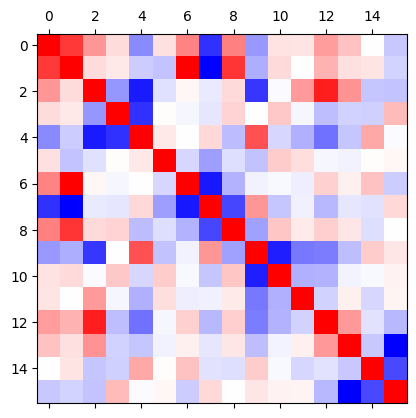

In [36]:
corr=np.corrcoef(Dtrain_vec.T)

fig, ax = plt.subplots(dpi=100)
ax.matshow(corr,vmin=-0.7,vmax=.7,cmap = 'bwr')
#for (i, j), z in np.ndenumerate(corr):
#    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

# Sequential model

    Since we want to predict if given a passenger is either dead or alive
    let us model it as "A binary classification" problem.
    
        1. The first try is going to be a Sequential model
        2. Lets try to implement a K-fold model

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
print(tf.config.list_physical_devices('GPU'))

2023-07-18 22:04:57.596097: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 22:04:58.697190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-07-18 22:04:59.811529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-18 22:05:00.001120: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-18 22:05:00.001208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [38]:
def model_titanic():
    
    model = keras.Sequential(name="titanic_Smodel")

    model.add(keras.Input(shape=(15,)))  ## argument must be the shape of each sample, not the shape of one batch.
    model.add(layers.Dense(16, activation="elu",kernel_initializer='uniform'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation="elu",kernel_initializer='uniform'))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation="sigmoid"))

    # then we build the model
    model.build()

    # Compile
    optimizer=keras.optimizers.Adam(5e-3)
    model.compile(optimizer=optimizer,#optimizer = "adam",#optimizer="rmsprop",   #good for default, generally good for any problem
    loss="binary_crossentropy",        # usually good when working with output probabilities 
    metrics=["accuracy"])
    
    return model


#######
model = model_titanic()
# and get a summary of the model to check the arquitecture
model_titanic().summary()

# Training
history = model.fit(Dtrain_vec[:,1:],Dtrain_vec[:,0],epochs=1000,batch_size=256,validation_split=0.4,shuffle=True)

2023-07-18 22:05:00.021137: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-18 22:05:00.021256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-18 22:05:00.021296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-18 22:05:01.680978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-18 22:05:01.681107: I tensorflow/compile

Model: "titanic_Smodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                256       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


2023-07-18 22:05:05.089779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-18 22:05:05.100167: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f64ac014150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-18 22:05:05.100209: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-07-18 22:05:05.105828: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-18 22:05:05.538370: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-18 22:05:05.663180: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-18 22:

3/3 [==============================] - 4s 96ms/step - loss: 0.6900 - accuracy: 0.5037 - val_loss: 0.6697 - val_accuracy: 0.6218
Epoch 2/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6683 - accuracy: 0.6124 - val_loss: 0.6401 - val_accuracy: 0.6218
Epoch 3/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6385 - accuracy: 0.6236 - val_loss: 0.6020 - val_accuracy: 0.6891
Epoch 4/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.5993 - accuracy: 0.6873 - val_loss: 0.5562 - val_accuracy: 0.7647
Epoch 5/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5549 - accuracy: 0.7416 - val_loss: 0.5125 - val_accuracy: 0.7815
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5199 - accuracy: 0.7790 - val_loss: 0.4794 - val_accuracy: 0.7703
Epoch 7/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4952 - accuracy: 0.8015 - val_loss: 0.4589 - val_accuracy: 0.7731
Epoch 8/1000
3/3 [========

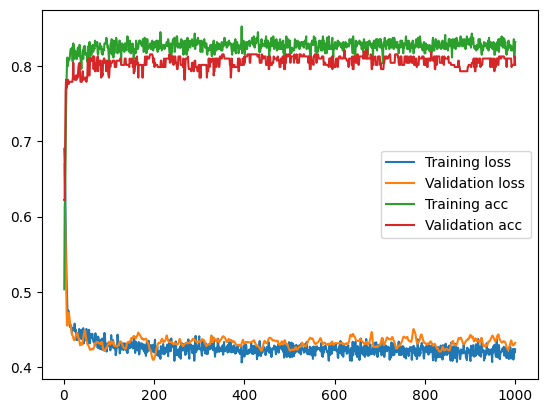

In [39]:
history_dict = history.history
history_dict.keys()


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = np.arange(1,len(loss_values)+1)

plt.plot(epochs,loss_values,label="Training loss")
plt.plot(epochs,val_loss_values,label="Validation loss")


acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, label="Training acc")
plt.plot(epochs, val_acc, label="Validation acc")

plt.legend()

    What should we expect?
        1. the training loss decreases with every epoch.
        2. the training accuracy should increases with every epoch. 


## Results

In [40]:
predictions= model.predict(Dtest_vec)

14/14 [==============================] - 0s 1ms/step


(array([6.98564583, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 3.01435335]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

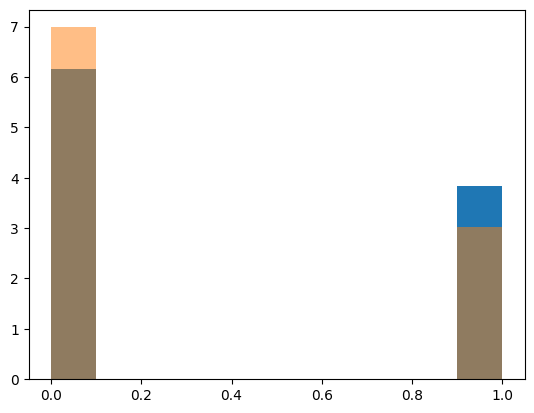

In [41]:

plt.hist(Dtrain_vec[:,0],density=True)
plt.hist(np.round(predictions),density=True,alpha=0.5)

# Final training and create sub_file

In [42]:
#######
#######
# preparing validation and training data set
model = model_titanic()
# Training
history = model.fit(Dtrain_vec[:,1:],Dtrain_vec[:,0],epochs=1000,batch_size=256,shuffle=True)
#######
#######

Epoch 1/1000
4/4 [==============================] - 1s 7ms/step - loss: 0.6805 - accuracy: 0.6184
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.6301 - accuracy: 0.6712
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.5707 - accuracy: 0.7116
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.5135 - accuracy: 0.7654
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4717 - accuracy: 0.7767
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.4569 - accuracy: 0.7879
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4578 - accuracy: 0.7991
Epoch 8/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.4510 - accuracy: 0.7946
Epoch 9/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.4494 - accuracy: 0.7991
Epoch 10/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4527 - accuracy: 0.8002
Epoch 11/1000
4/4 [

Text(0.5, 1.0, 'accuaracy')

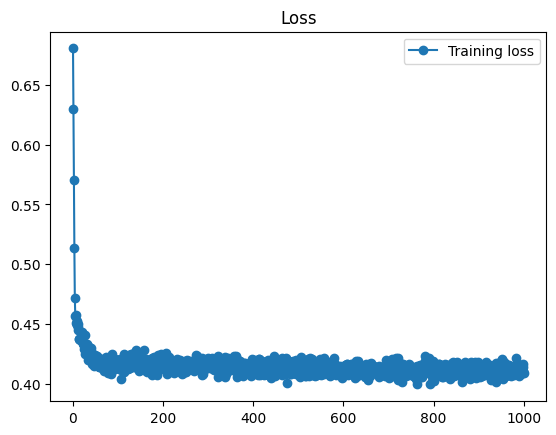

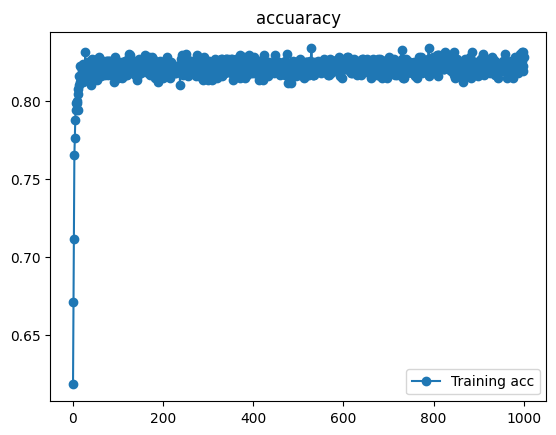

In [43]:
history_dict = history.history


plt.figure()
loss_values = history_dict['loss']
epochs = np.arange(1,len(loss_values)+1)

plt.plot(epochs,loss_values,"o-",label="Training loss")
plt.legend()
plt.title("Loss")


plt.figure()
acc = history_dict["accuracy"]
plt.plot(epochs, acc, "o-", label="Training acc")
plt.legend()
plt.title("accuaracy")

14/14 [==============================] - 0s 3ms/step


(array([7.1291865 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.87081271]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

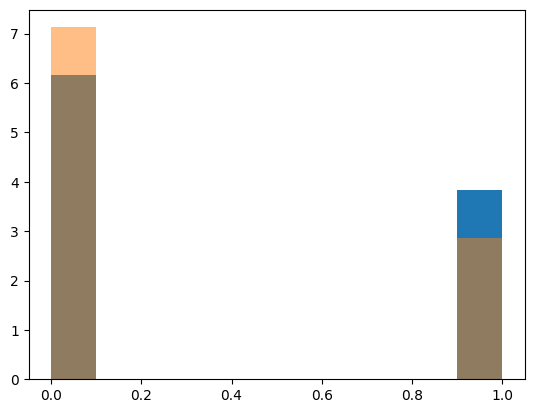

In [44]:
predictions= np.round(model.predict(Dtest_vec))
plt.hist(Dtrain_vec[:,0],density=True)
plt.hist(predictions,density=True,alpha=0.5)

In [45]:
test_df  = pd.read_csv('kdata_gender_submission.csv', sep=',', header='infer')

In [46]:
my_prediction = pd.DataFrame()
my_prediction['PassengerId']=np.copy(test_df['PassengerId'])
my_prediction['Survived']=predictions.astype(int)

my_prediction.to_csv('my_prediction.csv',sep=',',index=False)